<a href="https://colab.research.google.com/github/AnnegretH/test-repository/blob/master/_HEART_CSV_EXPLORATION_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import tensorflow as tf
from tensorflow import keras
from tensorboard.plugins.hparams import api as hp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorboard.plugins.hparams import api as hp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
data = pd.read_csv('heart.csv')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
#our data exploration tells us that we need to convert some of the categorical variables into dummy variables, and then scale all the values before we train the models with machine learning.  
#We first used the get_dummies method to make dummy columns for categorical variables.  See category pic.
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'restecg', 'exang', 'slope', 'ca', 'thal']) 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [0]:
#we did some standard scaling because there are some features that have many variations,
# and which are measured in inconsistent units.
# Some sort of standard scaling should always be used when features are measured using different units. 
# this allows us to scale down our value down to standard normal distribution
# we don't do it on the category features, we apply it to the remaining categories. 
#also note, not to do it on the target feature as that will already be zero. 

In [0]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
#now I'm going to split my data into training data and test data
#first, I return a random, shuffled sample of data
data1=data.sample(frac=1).reset_index(drop=True)
#to randomly assign t/f valeues to 
split=0.7
msk = np.random.rand(len(data)) < split
train_labels = data.loc[msk, data.columns =='Target']
train_data  = data.loc[msk, data.columns !='Target']

test_labels = data.loc[~msk, data.columns =='Target']
test_data  = data.loc[~msk, data.columns !='Target']

print(test_data.head(1))
print(test_labels.head(1))
print(train_data.head(1))
print(train_labels)

print(test_data.shape[0]+train_data.shape[0])



   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1

[1 rows x 14 columns]
Empty DataFrame
Columns: []
Index: [5]
   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1

[1 rows x 14 columns]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 7, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 78, 81, 83, 84, 85, 86, 87, 88, 89, 92, 97, 98, 100, 101, 102, 103, 104, 105, 108, 110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, ...]

[219 rows x 0 columns]
303


In [0]:
#normalize the data,  set y axis to 0

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


TypeError: ignored

In [0]:
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
#not deap network with activation function, but additional insights for report: using knearest neighbor and cross validation:
#for Knearest Neighbor, for train_data_x will be my independent feature, y will be my dependent feature
y = dataset['target']
x = dataset.drop(['target'], axis = 1)
from sklearn.model_selection import cross_val_score


knn_scores = []
for k in range (1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  score=cross_val_score(knn_classifier,x,y,cv=10)
  knn_scores.append(score.mean())
  

In [0]:

data.shape
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(14, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(14, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
    
  model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model
  
 
 

In [0]:
model = build_model()
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 30        
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

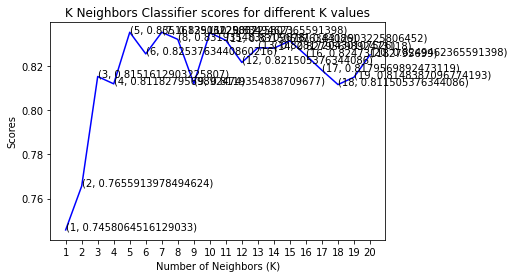

In [0]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
#this is for cross val.  not the test data. 
#ke

In [0]:
knn_scores

[0.7458064516129033,
 0.7655913978494624,
 0.8151612903225807,
 0.8118279569892474,
 0.8351612903225807,
 0.8253763440860216,
 0.8351612903225807,
 0.8319354838709678,
 0.8119354838709677,
 0.8349462365591398,
 0.831505376344086,
 0.821505376344086,
 0.8281720430107526,
 0.8279569892473118,
 0.8312903225806452,
 0.824731182795699,
 0.8179569892473119,
 0.811505376344086,
 0.8148387096774193,
 0.8249462365591398]

In [0]:

#it looks like the best accuracy was at k=10
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
score=cross_val_score(knn_classifier,x,y,cv=10)
score.mean ()
#for knn  , k=10 the accuracy was 83.5%

0.8349462365591398

In [0]:

#it looks like the best accuracy was at k=10
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
score=cross_val_score(knn_classifier,x,y,cv=10)
score.mean ()
#for knn  , k=10 the accuracy was 83.5%

0.8349462365591398